* Variables:
*holiday: US National holidays plus regional holiday, Minnesota State Fair		no
temp	Feature	Continuous	Average temp in kelvin	Kelvin	no
rain_1h	Feature	Continuous	Amount in mm of rain that occurred in the hour	mm	no
snow_1h	Feature	Continuous	Amount in mm of snow that occurred in the hour	mm	no
clouds_all	Feature	Integer	Percentage of cloud cover	%	no
weather_main	Feature	Categorical	Short textual description of the current weather		no
weather_description	Feature	Categorical	Longer textual description of the current weather		no
date_time	Feature	Date	Hour of the data collected in local CST time		no
traffic_volume	Target	Integer	Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv('/kaggle/input/metro-interstate-traffic-volume/Metro_Interstate_Traffic_Volume.csv',parse_dates=['date_time'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [4]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711616,3259.818355
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.160000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670


In [5]:
df['rain_1h'].value_counts()

rain_1h
0.00     44737
0.25       948
0.51       256
1.02       123
0.30       121
         ...  
11.59        1
0.73         1
12.45        1
1.90         1
5.11         1
Name: count, Length: 372, dtype: int64

In [6]:
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
df.tail(15)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48189,NaN,282.18,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 11:00:00,4049
48190,NaN,282.69,0.00,0.0,75,Clouds,broken clouds,2018-09-30 12:00:00,4429
48191,NaN,283.03,0.00,0.0,90,Rain,light rain,2018-09-30 13:00:00,4547
48192,NaN,283.48,0.00,0.0,90,Rain,light rain,2018-09-30 14:00:00,4380
48193,NaN,283.48,0.00,0.0,90,Drizzle,light intensity drizzle,2018-09-30 14:00:00,4380
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,NaN,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [8]:
df.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop('holiday',axis=1,inplace=True)
#drop duplicates
df.drop_duplicates(inplace=True)


In [11]:
df.head(5)

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


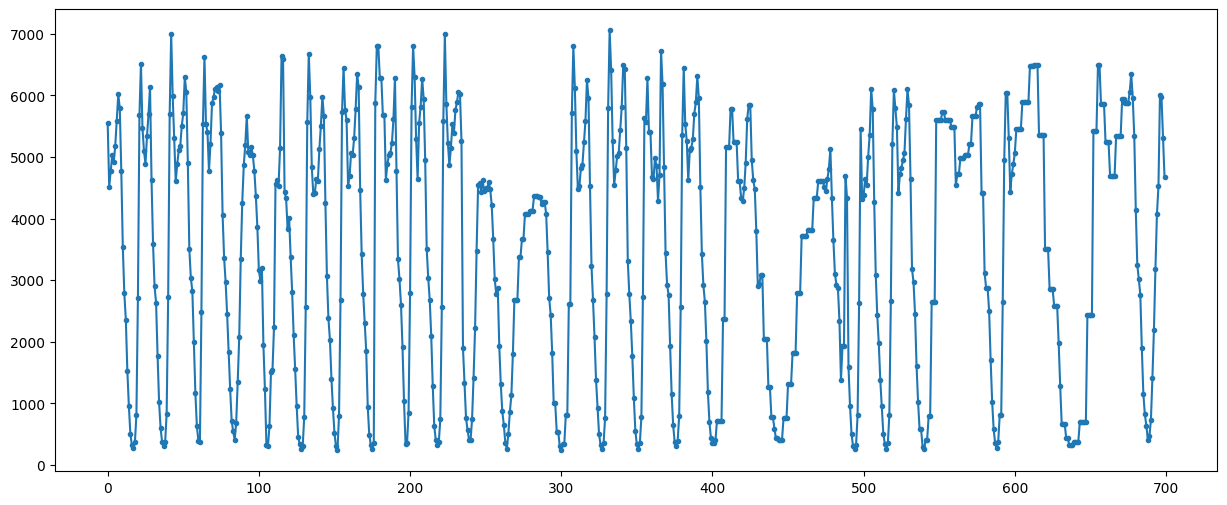

In [12]:
df_specific = df.iloc[:700]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show() # we notice there is a weekly pattern

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temp                 48187 non-null  float64       
 1   rain_1h              48187 non-null  float64       
 2   snow_1h              48187 non-null  float64       
 3   clouds_all           48187 non-null  int64         
 4   weather_main         48187 non-null  object        
 5   weather_description  48187 non-null  object        
 6   date_time            48187 non-null  datetime64[ns]
 7   traffic_volume       48187 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 3.3+ MB


In [15]:
#5 lag features
for i in range(1,6):
  df[f'lag_{i}'] = df['traffic_volume'].shift(i)

df.dropna(inplace=True)


X = df.drop(columns='traffic_volume')
y = df['traffic_volume']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)  #  80% train_val  20% test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)   # 80% train 20% val

In [16]:
# X_train[num_col] = scaler.fit_transform(X_train[num_col])
# X_val[num_col] = scaler.transform(X_val[num_col])
# X_test[num_col] = scaler.transform(X_test[num_col])

# y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
# y_val = scaler.transform(y_val.values.reshape(-1,1))
# y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
# y_val = pd.DataFrame(y_val, columns=['traffic_volume'])

In [17]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [18]:
num_col = X_train.select_dtypes(include='number').columns
cat_col = X_train.select_dtypes(include='object').columns

In [19]:
onehot = OneHotEncoder(drop='first')
scaler =  MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Scale numerical features
        ('cat', onehot, cat_col)  # OneHotEncode categorical features
    ])



In [20]:
cat_col

Index(['weather_main', 'weather_description'], dtype='object')

In [21]:
X_train

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,lag_1,lag_2,lag_3,lag_4,lag_5
5,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,4918.0,5026.0,4767.0,4516.0,5545.0
6,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5181.0,4918.0,5026.0,4767.0,4516.0
7,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,5584.0,5181.0,4918.0,5026.0,4767.0
8,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,6015.0,5584.0,5181.0,4918.0,5026.0
9,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,5791.0,6015.0,5584.0,5181.0,4918.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30843,268.96,0.0,0.0,90,Mist,mist,2017-02-07 12:00:00,4108.0,4108.0,3927.0,3927.0,4140.0
30844,268.96,0.0,0.0,90,Snow,light snow,2017-02-07 12:00:00,4339.0,4108.0,4108.0,3927.0,3927.0
30845,268.62,0.0,0.0,90,Mist,mist,2017-02-07 13:00:00,4339.0,4339.0,4108.0,4108.0,3927.0
30846,268.62,0.0,0.0,90,Snow,light snow,2017-02-07 13:00:00,4321.0,4339.0,4339.0,4108.0,4108.0


In [22]:
train_time = X_train['date_time']
val_time = X_val['date_time']
test_time = X_test['date_time']


In [23]:
X_train.drop('date_time',axis=1,inplace=True)
X_val.drop('date_time',axis=1,inplace=True)      #remove timestep since it disappear after encoding then add it back after
X_test.drop('date_time',axis=1,inplace=True)

In [24]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()  #it outputs sparse matrix so we use .toarray()
X_test = preprocessor.transform(X_test).toarray()

In [25]:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val = scaler.transform(y_val.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))
y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
y_val = pd.DataFrame(y_val, columns=['traffic_volume'])
y_test = pd.DataFrame(y_test, columns=['traffic_volume'])


In [26]:
X_train.dropna(inplace=True)
X_val.dropna(inplace=True)

In [27]:
X_train.set_index(train_time,inplace=True)
X_val.set_index(val_time,inplace=True)
X_test.set_index(test_time,inplace=True)

In [28]:
X_train

,num__temp,num__rain_1h,num__snow_1h,num__clouds_all,num__lag_1,num__lag_2,num__lag_3,num__lag_4,num__lag_5,cat__weather_main_Clouds,...,cat__weather_description_sleet,cat__weather_description_smoke,cat__weather_description_snow,cat__weather_description_thunderstorm,cat__weather_description_thunderstorm with drizzle,cat__weather_description_thunderstorm with heavy rain,cat__weather_description_thunderstorm with light drizzle,cat__weather_description_thunderstorm with light rain,cat__weather_description_thunderstorm with rain,cat__weather_description_very heavy rain
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 14:00:00,0.946405,0.0,0.0,0.01,0.677410,0.692287,0.656612,0.622039,0.763774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 15:00:00,0.951110,0.0,0.0,0.01,0.713636,0.677410,0.692287,0.656612,0.622039,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 16:00:00,0.953348,0.0,0.0,0.01,0.769146,0.713636,0.677410,0.692287,0.656612,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 17:00:00,0.954256,0.0,0.0,0.20,0.828512,0.769146,0.713636,0.677410,0.692287,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 18:00:00,0.950882,0.0,0.0,0.20,0.797658,0.828512,0.769146,0.713636,0.677410,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-07 12:00:00,0.872567,0.0,0.0,0.90,0.565840,0.565840,0.540909,0.540909,0.570248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-07 12:00:00,0.872567,0.0,0.0,0.90,0.597658,0.565840,0.565840,0.540909,0.540909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-07 13:00:00,0.871464,0.0,0.0,0.90,0.597658,0.597658,0.565840,0.565840,0.540909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_train.shape

(30836, 56)

In [30]:
y_train.shape

(30836, 1)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30836 entries, 2012-10-02 14:00:00 to 2017-02-07 14:00:00
Data columns (total 56 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   num__temp                                                     30836 non-null  float64
 1   num__rain_1h                                                  30836 non-null  float64
 2   num__snow_1h                                                  30836 non-null  float64
 3   num__clouds_all                                               30836 non-null  float64
 4   num__lag_1                                                    30836 non-null  float64
 5   num__lag_2                                                    30836 non-null  float64
 6   num__lag_3                                                    30836 non-null  float64
 7   num__lag_4                      

In [32]:
import keras
from keras import layers

In [33]:
keras.utils.set_random_seed(42)

In [34]:
#Model Arch

model_RNN = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(32, return_sequences=True, recurrent_dropout=0.15),
    layers.SimpleRNN(64, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.15),
    layers.SimpleRNN(128),
    layers.Dense(1), # <-- Regression
])

model_RNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 56, 32)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 56, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:

model_lstm = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.LSTM(32, return_sequences=True, recurrent_dropout=0.15),
    layers.LSTM(64, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.15),
    layers.LSTM(128),
    layers.Dense(1),  # <-- Regression
])

model_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 56, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 56, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,129 (500.50 KB)

 Trainable params: 128,129 (500.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_gru = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.GRU(32, return_sequences=True, recurrent_dropout=0.15),
    layers.GRU(64, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.15),
    layers.GRU(128),
    layers.Dense(1),  # <-- Regression
])

model_gru.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 56, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 56, 64)         │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,801 (378.13 KB)

 Trainable params: 96,801 (378.13 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_RNN.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_lstm.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_gru.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

In [38]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=30,
    restore_best_weights=True,
)


In [39]:
X_val.shape

(7709, 56)

In [40]:
RNN_history = model_RNN.fit(
    X_train, y_train,
    # initial_epoch=100,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
)

Epoch 1/70


I0000 00:00:1724503912.698321      88 service.cc:145] XLA service 0x592d95a985b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724503912.698371      88 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724503912.698374      88 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  7/241 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4979 - mean_squared_error: 0.3919

I0000 00:00:1724503918.537022      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 0.2990 - mean_squared_error: 0.1408 - val_loss: 0.2291 - val_mean_squared_error: 0.0757
Epoch 2/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2382 - mean_squared_error: 0.0799 - val_loss: 0.1731 - val_mean_squared_error: 0.0462
Epoch 3/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2074 - mean_squared_error: 0.0654 - val_loss: 0.1641 - val_mean_squared_error: 0.0435
Epoch 4/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1927 - mean_squared_error: 0.0595 - val_loss: 0.1469 - val_mean_squared_error: 0.0354
Epoch 5/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1782 - mean_squared_error: 0.0532 - val_loss: 0.1396 - val_mean_squared_error: 0.0318
Epoch 6/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1743 - mean_squared_error: 0.0517 - val_loss: 0.1401 - val_mean_squared_error: 0.0310
Epoch 7/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1659 - mean_squared_error: 0.0479 - val_loss: 0.1387 

In [41]:
LSTM_history = model_lstm.fit(
     X_train, y_train,
    # initial_epoch=100,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
)

Epoch 1/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 39s 138ms/step - loss: 0.2494 - mean_squared_error: 0.0929 - val_loss: 0.1595 - val_mean_squared_error: 0.0473
Epoch 2/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - loss: 0.1800 - mean_squared_error: 0.0579 - val_loss: 0.1496 - val_mean_squared_error: 0.0450
Epoch 3/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - loss: 0.1682 - mean_squared_error: 0.0530 - val_loss: 0.1436 - val_mean_squared_error: 0.0419
Epoch 4/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - loss: 0.1580 - mean_squared_error: 0.0468 - val_loss: 0.1381 - val_mean_squared_error: 0.0371
Epoch 5/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - loss: 0.1458 - mean_squared_error: 0.0407 - val_loss: 0.1281 - val_mean_squared_error: 0.0350
Epoch 6/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - loss: 0.1362 - mean_squared_error: 0.0362 - val_loss: 0.1226 - val_mean_squared_error: 0.0328
Epoch 7/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - loss: 0.1303 - mean_squared_error: 0.

In [42]:
GRU_history = model_gru.fit(
    X_train, y_train,
    # initial_epoch=100,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    
)

Epoch 1/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 48s 184ms/step - loss: 0.2633 - mean_squared_error: 0.0975 - val_loss: 0.2437 - val_mean_squared_error: 0.0767
Epoch 2/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 182ms/step - loss: 0.2450 - mean_squared_error: 0.0796 - val_loss: 0.2504 - val_mean_squared_error: 0.0808
Epoch 3/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 182ms/step - loss: 0.2455 - mean_squared_error: 0.0790 - val_loss: 0.2526 - val_mean_squared_error: 0.0822
Epoch 4/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - loss: 0.2452 - mean_squared_error: 0.0783 - val_loss: 0.2520 - val_mean_squared_error: 0.0818
Epoch 5/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 182ms/step - loss: 0.2450 - mean_squared_error: 0.0779 - val_loss: 0.2512 - val_mean_squared_error: 0.0813
Epoch 6/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 184ms/step - loss: 0.2449 - mean_squared_error: 0.0779 - val_loss: 0.2513 - val_mean_squared_error: 0.0814
Epoch 7/70
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 181ms/step - loss: 0.2448 - mean_squared_error: 0.

In [43]:
y_train

,traffic_volume
0,0.713636
1,0.769146
2,0.828512
3,0.797658
4,0.657025
...,...
30831,0.597658
30832,0.597658
30833,0.595179
30834,0.595179


<Axes: >

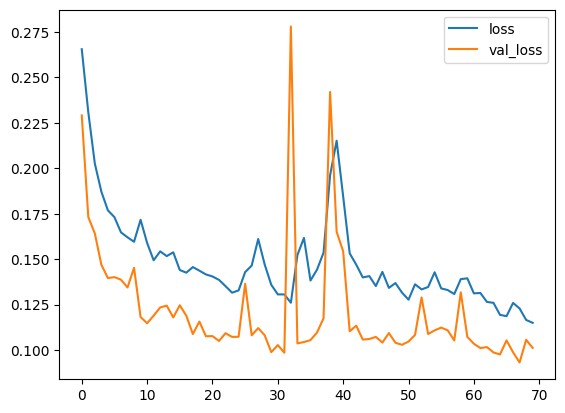

In [44]:
pd.DataFrame(RNN_history.history)[['loss','val_loss']].plot()

<Axes: >

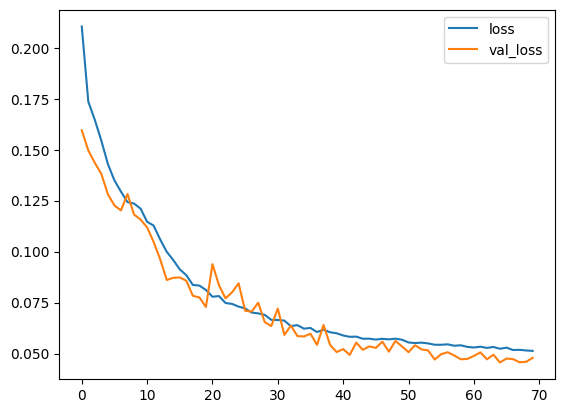

In [45]:
pd.DataFrame(LSTM_history.history)[['loss','val_loss']].plot()

<Axes: >

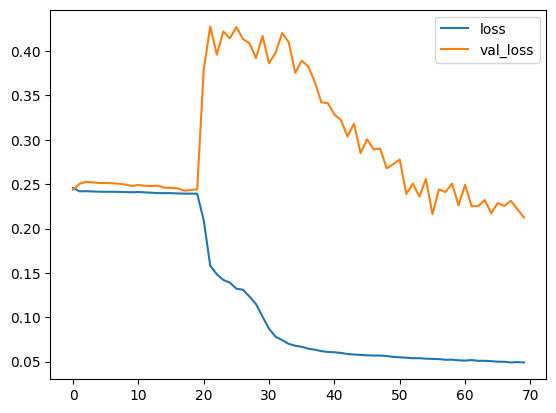

In [46]:
pd.DataFrame(GRU_history.history)[['loss','val_loss']].plot()

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
RNN_pred= model_RNN.predict(X_test)
mse = mean_squared_error(y_test, RNN_pred)
print(f'Mean Squared Error: {mse}')

302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Mean Squared Error: 0.014988748796558754


In [49]:
LSTM_pred= model_lstm.predict(X_test)
mse = mean_squared_error(y_test, LSTM_pred)
print(f'Mean Squared Error: {mse}')

302/302 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
Mean Squared Error: 0.004697500955193267


In [50]:
GRU_pred= model_gru.predict(X_test)
mse = mean_squared_error(y_test, GRU_pred)
print(f'Mean Squared Error: {mse}')

302/302 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
Mean Squared Error: 0.07177333998725716


In [51]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

y_train_transformed, fitted_lambda = boxcox(y_train['traffic_volume'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(y_train_transformed, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Data')

plt.tight_layout()
plt.show()

print("Fitted Lambda: ", fitted_lambda)


ValueError: Data must be positive.

In [ ]:
#show me the normalized distribution of y_train
plt.hist(y_train, bins=50)
plt.show()
y_train_log = np.log1p(y_train)  # log1p is used to avoid log(0) issues


In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()